In [1]:
import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


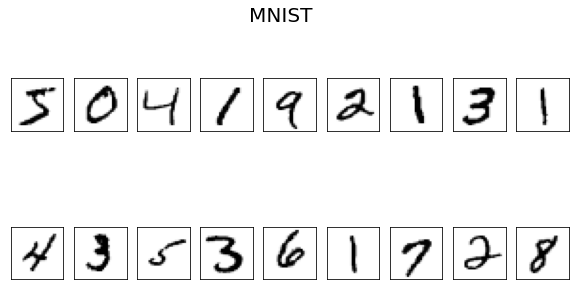

In [3]:
fig, axes = plt.subplots(2, 9, figsize=(10, 5))
fig.suptitle('MNIST', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(train_images[n], cmap='Greys')
    n += 1

In [4]:
checkpoint_cd = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [5]:
def build_in(n_hidden = 2, n_neurous=64, optimizer = "Adam"):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [28,28]))
    model.add(keras.layers.BatchNormalization())
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurous, activation="elu"))
        model.add(keras.layers.Dropout(rate=0.2))
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model    

In [6]:
keras_cls = keras.wrappers.scikit_learn.KerasClassifier(build_in)

C:\Users\spvag\AppData\Local\Temp/ipykernel_11360/4194778242.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cls = keras.wrappers.scikit_learn.KerasClassifier(build_in)


In [7]:
param_distribs = {
    "n_hidden": [2, 3],
    "n_neurous": [128, 254],
    "optimizer": ["SGD", "Nadam", "RMSprop"]
}

In [8]:
rnd = GridSearchCV(keras_cls, param_distribs, cv = 3)

In [9]:
%%time
rnd.fit(train_images, 
          to_categorical(train_labels), 
          epochs=50, 
          batch_size=32,
          validation_split=0.3,
          callbacks=[checkpoint_cd, early_stopping])

Epoch 1/50
875/875 [==============================] - 5s 5ms/step - loss: 0.6355 - accuracy: 0.8006 - val_loss: 0.4627 - val_accuracy: 0.9055
Epoch 2/50
875/875 [==============================] - 2s 3ms/step - loss: 0.4125 - accuracy: 0.8726 - val_loss: 0.4372 - val_accuracy: 0.9187
Epoch 3/50
875/875 [==============================] - 2s 3ms/step - loss: 0.3653 - accuracy: 0.8885 - val_loss: 0.3969 - val_accuracy: 0.9254
Epoch 4/50
875/875 [==============================] - 3s 3ms/step - loss: 0.3337 - accuracy: 0.8983 - val_loss: 0.3831 - val_accuracy: 0.9313
Epoch 5/50
875/875 [==============================] - 3s 3ms/step - loss: 0.3086 - accuracy: 0.9068 - val_loss: 0.3798 - val_accuracy: 0.9343
Epoch 6/50
875/875 [==============================] - 3s 3ms/step - loss: 0.2907 - accuracy: 0.9105 - val_loss: 0.3530 - val_accuracy: 0.9378
Epoch 7/50
875/875 [==============================] - 2s 3ms/step - loss: 0.2737 - accuracy: 0.9167 - val_loss: 0.3884 - val_accuracy: 0.9393
Epoch 

875/875 [==============================] - 2s 3ms/step - loss: 0.2384 - accuracy: 0.9277 - val_loss: 0.3773 - val_accuracy: 0.9374
Epoch 10/50
875/875 [==============================] - 2s 3ms/step - loss: 0.2345 - accuracy: 0.9287 - val_loss: 0.3750 - val_accuracy: 0.9375
Epoch 11/50
875/875 [==============================] - 2s 3ms/step - loss: 0.2197 - accuracy: 0.9320 - val_loss: 0.3854 - val_accuracy: 0.9393
Epoch 12/50
875/875 [==============================] - 2s 3ms/step - loss: 0.2131 - accuracy: 0.9341 - val_loss: 0.3776 - val_accuracy: 0.9394
Epoch 13/50
875/875 [==============================] - 2s 3ms/step - loss: 0.2042 - accuracy: 0.9362 - val_loss: 0.3592 - val_accuracy: 0.9427
Epoch 14/50
875/875 [==============================] - 2s 3ms/step - loss: 0.2023 - accuracy: 0.9394 - val_loss: 0.4279 - val_accuracy: 0.9439
Epoch 15/50
875/875 [==============================] - 2s 3ms/step - loss: 0.1902 - accuracy: 0.9419 - val_loss: 0.3915 - val_accuracy: 0.9449
Epoch 16/50

875/875 [==============================] - 3s 3ms/step - loss: 0.1891 - accuracy: 0.9424 - val_loss: 0.4263 - val_accuracy: 0.9578
Epoch 4/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1661 - accuracy: 0.9497 - val_loss: 0.5622 - val_accuracy: 0.9600
Epoch 5/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1446 - accuracy: 0.9553 - val_loss: 0.5243 - val_accuracy: 0.9615
Epoch 6/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1320 - accuracy: 0.9593 - val_loss: 0.7842 - val_accuracy: 0.9664
Epoch 7/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1184 - accuracy: 0.9634 - val_loss: 0.6684 - val_accuracy: 0.9688
Epoch 8/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1149 - accuracy: 0.9639 - val_loss: 0.6771 - val_accuracy: 0.9675
Epoch 9/50
875/875 [==============================] - 3s 4ms/step - loss: 0.1045 - accuracy: 0.9673 - val_loss: 0.8333 - val_accuracy: 0.9687
Epoch 10/50
875/8

625/625 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.9523
Epoch 1/50
875/875 [==============================] - 4s 4ms/step - loss: 0.5547 - accuracy: 0.8267 - val_loss: 0.4005 - val_accuracy: 0.9143
Epoch 2/50
875/875 [==============================] - 4s 4ms/step - loss: 0.3641 - accuracy: 0.8895 - val_loss: 0.3476 - val_accuracy: 0.9255
Epoch 3/50
875/875 [==============================] - 3s 4ms/step - loss: 0.3230 - accuracy: 0.9036 - val_loss: 0.3584 - val_accuracy: 0.9304
Epoch 4/50
875/875 [==============================] - 4s 4ms/step - loss: 0.2918 - accuracy: 0.9134 - val_loss: 0.3408 - val_accuracy: 0.9367
Epoch 5/50
875/875 [==============================] - 4s 4ms/step - loss: 0.2707 - accuracy: 0.9177 - val_loss: 0.3408 - val_accuracy: 0.9397
Epoch 6/50
875/875 [==============================] - 4s 4ms/step - loss: 0.2543 - accuracy: 0.9222 - val_loss: 0.2793 - val_accuracy: 0.9448
Epoch 7/50
875/875 [==============================] - 4s 4m

875/875 [==============================] - 5s 6ms/step - loss: 0.1101 - accuracy: 0.9642 - val_loss: 0.3501 - val_accuracy: 0.9627
Epoch 6/50
875/875 [==============================] - 5s 6ms/step - loss: 0.0976 - accuracy: 0.9676 - val_loss: 0.3246 - val_accuracy: 0.9663
Epoch 7/50
875/875 [==============================] - 5s 6ms/step - loss: 0.0860 - accuracy: 0.9716 - val_loss: 0.4627 - val_accuracy: 0.9672
Epoch 8/50
875/875 [==============================] - 5s 6ms/step - loss: 0.0760 - accuracy: 0.9749 - val_loss: 0.3832 - val_accuracy: 0.9663
Epoch 9/50
875/875 [==============================] - 5s 6ms/step - loss: 0.0696 - accuracy: 0.9774 - val_loss: 0.3839 - val_accuracy: 0.9676
Epoch 10/50
875/875 [==============================] - 5s 6ms/step - loss: 0.0691 - accuracy: 0.9782 - val_loss: 0.3587 - val_accuracy: 0.9688
Epoch 11/50
625/625 [==============================] - 1s 2ms/step - loss: 0.4689 - accuracy: 0.9398
Epoch 1/50
875/875 [==============================] - 6s 

875/875 [==============================] - 5s 5ms/step - loss: 0.1226 - accuracy: 0.9608 - val_loss: 0.8662 - val_accuracy: 0.9630
Epoch 5/50
875/875 [==============================] - 4s 5ms/step - loss: 0.1084 - accuracy: 0.9663 - val_loss: 0.8142 - val_accuracy: 0.9629
Epoch 6/50
875/875 [==============================] - 4s 5ms/step - loss: 0.0947 - accuracy: 0.9711 - val_loss: 0.8706 - val_accuracy: 0.9670
Epoch 7/50
875/875 [==============================] - 4s 5ms/step - loss: 0.0819 - accuracy: 0.9742 - val_loss: 0.6778 - val_accuracy: 0.9688
Epoch 8/50
875/875 [==============================] - 4s 5ms/step - loss: 0.0782 - accuracy: 0.9750 - val_loss: 1.0382 - val_accuracy: 0.9688
Epoch 9/50
875/875 [==============================] - 4s 5ms/step - loss: 0.0684 - accuracy: 0.9780 - val_loss: 1.0461 - val_accuracy: 0.9669
Epoch 10/50
875/875 [==============================] - 4s 5ms/step - loss: 0.0658 - accuracy: 0.9785 - val_loss: 0.9948 - val_accuracy: 0.9673
Epoch 11/50
625/

875/875 [==============================] - 3s 3ms/step - loss: 0.1707 - accuracy: 0.9445 - val_loss: 0.1990 - val_accuracy: 0.9603
Epoch 24/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1678 - accuracy: 0.9464 - val_loss: 0.2008 - val_accuracy: 0.9613
Epoch 25/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1688 - accuracy: 0.9447 - val_loss: 0.1930 - val_accuracy: 0.9609
Epoch 26/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1602 - accuracy: 0.9484 - val_loss: 0.1828 - val_accuracy: 0.9632
Epoch 27/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1564 - accuracy: 0.9507 - val_loss: 0.2065 - val_accuracy: 0.9631
Epoch 28/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1603 - accuracy: 0.9478 - val_loss: 0.1897 - val_accuracy: 0.9643
Epoch 29/50
875/875 [==============================] - 3s 3ms/step - loss: 0.1525 - accuracy: 0.9507 - val_loss: 0.2102 - val_accuracy: 0.9632
Epoch 30/50

Epoch 15/50
625/625 [==============================] - 1s 2ms/step - loss: 0.3980 - accuracy: 0.9567
Epoch 1/50
875/875 [==============================] - 5s 4ms/step - loss: 0.4694 - accuracy: 0.8517 - val_loss: 0.5460 - val_accuracy: 0.9325
Epoch 2/50
875/875 [==============================] - 4s 4ms/step - loss: 0.2634 - accuracy: 0.9189 - val_loss: 0.6835 - val_accuracy: 0.9462
Epoch 3/50
875/875 [==============================] - 4s 4ms/step - loss: 0.2083 - accuracy: 0.9346 - val_loss: 0.7172 - val_accuracy: 0.9527
Epoch 4/50
875/875 [==============================] - 4s 4ms/step - loss: 0.1774 - accuracy: 0.9447 - val_loss: 0.9410 - val_accuracy: 0.9537
Epoch 5/50
875/875 [==============================] - 4s 4ms/step - loss: 0.1573 - accuracy: 0.9522 - val_loss: 0.8945 - val_accuracy: 0.9590
Epoch 6/50
875/875 [==============================] - 4s 4ms/step - loss: 0.1397 - accuracy: 0.9560 - val_loss: 0.6911 - val_accuracy: 0.9564
Epoch 7/50
875/875 [===========================

875/875 [==============================] - 4s 5ms/step - loss: 0.2599 - accuracy: 0.9173 - val_loss: 0.3181 - val_accuracy: 0.9413
Epoch 7/50
875/875 [==============================] - 4s 5ms/step - loss: 0.2472 - accuracy: 0.9228 - val_loss: 0.2765 - val_accuracy: 0.9457
Epoch 8/50
875/875 [==============================] - 4s 5ms/step - loss: 0.2277 - accuracy: 0.9289 - val_loss: 0.3346 - val_accuracy: 0.9469
Epoch 9/50
875/875 [==============================] - 4s 5ms/step - loss: 0.2223 - accuracy: 0.9306 - val_loss: 0.2905 - val_accuracy: 0.9504
Epoch 10/50
875/875 [==============================] - 4s 5ms/step - loss: 0.2071 - accuracy: 0.9351 - val_loss: 0.3361 - val_accuracy: 0.9509
Epoch 11/50
875/875 [==============================] - 4s 5ms/step - loss: 0.2004 - accuracy: 0.9370 - val_loss: 0.2912 - val_accuracy: 0.9517
Epoch 12/50
875/875 [==============================] - 4s 5ms/step - loss: 0.1963 - accuracy: 0.9387 - val_loss: 0.2847 - val_accuracy: 0.9537
Epoch 13/50
87

875/875 [==============================] - 5s 5ms/step - loss: 0.2220 - accuracy: 0.9317 - val_loss: 0.3419 - val_accuracy: 0.9438
Epoch 9/50
875/875 [==============================] - 5s 5ms/step - loss: 0.2100 - accuracy: 0.9352 - val_loss: 0.3597 - val_accuracy: 0.9424
Epoch 10/50
875/875 [==============================] - 5s 5ms/step - loss: 0.2031 - accuracy: 0.9364 - val_loss: 0.3296 - val_accuracy: 0.9473
Epoch 11/50
875/875 [==============================] - 5s 5ms/step - loss: 0.1935 - accuracy: 0.9408 - val_loss: 0.3574 - val_accuracy: 0.9482
Epoch 12/50
875/875 [==============================] - 5s 5ms/step - loss: 0.1887 - accuracy: 0.9417 - val_loss: 0.3320 - val_accuracy: 0.9484
Epoch 13/50
875/875 [==============================] - 5s 5ms/step - loss: 0.1746 - accuracy: 0.9452 - val_loss: 0.3273 - val_accuracy: 0.9500
Epoch 14/50
875/875 [==============================] - 5s 5ms/step - loss: 0.1739 - accuracy: 0.9452 - val_loss: 0.3368 - val_accuracy: 0.9519
Epoch 15/50


875/875 [==============================] - 5s 6ms/step - loss: 0.1132 - accuracy: 0.9652 - val_loss: 1.2298 - val_accuracy: 0.9668
Epoch 7/50
875/875 [==============================] - 5s 6ms/step - loss: 0.1027 - accuracy: 0.9684 - val_loss: 1.1777 - val_accuracy: 0.9701
Epoch 8/50
875/875 [==============================] - 5s 6ms/step - loss: 0.0958 - accuracy: 0.9707 - val_loss: 1.1979 - val_accuracy: 0.9685
Epoch 9/50
875/875 [==============================] - 5s 6ms/step - loss: 0.0916 - accuracy: 0.9711 - val_loss: 1.5782 - val_accuracy: 0.9709
Epoch 10/50
875/875 [==============================] - 5s 6ms/step - loss: 0.0833 - accuracy: 0.9733 - val_loss: 1.4993 - val_accuracy: 0.9687
Epoch 11/50
625/625 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.9434
Epoch 1/50
875/875 [==============================] - 7s 7ms/step - loss: 0.4111 - accuracy: 0.8742 - val_loss: 0.3501 - val_accuracy: 0.9434
Epoch 2/50
875/875 [==============================] - 6s 

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000174952482E0>,
             param_grid={'n_hidden': [2, 3], 'n_neurous': [128, 254],
                         'optimizer': ['SGD', 'Nadam', 'RMSprop']})

In [10]:
rnd.best_params_

{'n_hidden': 3, 'n_neurous': 254, 'optimizer': 'SGD'}

In [11]:
rnd.best_score_

0.9531000057856241

In [12]:
model = rnd.best_estimator_.model

In [13]:
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

313/313 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9645


[0.17297707498073578, 0.9645000100135803]

### Используемые новые функции(команды):
    
    - model.add() - позволяет использовать циклы при посторении модели
    - keras.layers.Flatten() - Выравнивает входные данные. Входной слой позволяет исключить из подготовки данных преобразование в вектор.
    - keras.layers.BatchNormalization() - Слой, который нормализует свои входные данные.
    - keras.layers.Dropout() - слой регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети, путём исключения во время обучения нейроной выбранных случайным образом. 
    keras.callbacks.ModelCheckpoint("my_keras_model.h5") - функция обратного вызова, для сохранения модели или весов (в файле контрольной точки) через некоторый интервал, поэтому модель или веса могут быть загружены позже, чтобы продолжить обучение из сохраненного состояния.
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True) - функция обратного вызова. Прекращает обучение, когда контролируемый показатель перестаёт улучшаться.
    keras.wrappers.scikit_learn.KerasClassifier() - реализует интерфейс классификатора Scikit-Learn
    
    
    
    
    
    
    
    
    

### Выводы:

В работе удалось сформировать и обучить модель с использованием алгоритма подбора гиперпараметров. Результат показывает что, не всегда самые лучшие и продвинутые алгоритмы (в данном случае оптимизатор) являются идеальными в каждом конкретном случае. В силу больших временных затрат не удалось провести расширенный поиск оптимальных параметров модели, но при необходимости это легко реализовать на основе получившегося кода. Также полученный результат позволяет легко и быстро менять как структуру нейронной сети так и производить подбро оптимальных параметров. 
